In [1]:
import torch
import torch.utils.data
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
import pandas as pd
from torchvision.utils import save_image
import random


c:\Users\deniz\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("mnist_train.csv", header = None)
testData = pd.read_csv("mnist_train.csv", header = None)

In [3]:
allData = np.array(data)
allTestData = np.array(testData)

In [4]:
y = allData[:,0]
X = np.delete(allData, 0, 1) / 255

y_test = allTestData[:,0]
X_test = np.delete(allTestData, 0, 1) / 255

In [5]:
save_image(torch.tensor([X[0]]).view(-1, 1, 28, 28), "results/5.png")

C:\Users\deniz\AppData\Local\Temp\ipykernel_10384\3314637757.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  save_image(torch.tensor([X[0]]).view(-1, 1, 28, 28), "results/5.png")


In [6]:
X_subset = X[0:10000]

Initialization 0
  Iteration 10	 time lapse 32.15152s	 ll change 0.36007
  Iteration 20	 time lapse 31.08054s	 ll change 0.11647
  Iteration 30	 time lapse 30.42391s	 ll change 0.02597
  Iteration 40	 time lapse 30.63370s	 ll change -0.00000
Initialization converged: True	 time lapse 124.28967s	 ll 2472.42732
Initialization 0
  Iteration 10	 time lapse 61.92224s	 ll change 0.02807
Initialization converged: True	 time lapse 91.15970s	 ll 2800.77207
Initialization 0
  Iteration 10	 time lapse 91.73060s	 ll change 0.02150
Initialization converged: True	 time lapse 109.13796s	 ll 3142.91216
Initialization 0
Initialization converged: True	 time lapse 41.01076s	 ll 3403.99836
Initialization 0
Initialization converged: True	 time lapse 50.83186s	 ll 3582.00714
Initialization 0
Initialization converged: True	 time lapse 43.74804s	 ll 3746.94651
Initialization 0
Initialization converged: True	 time lapse 71.06986s	 ll 3855.64362
Initialization 0
Initialization converged: True	 time lapse 128.50

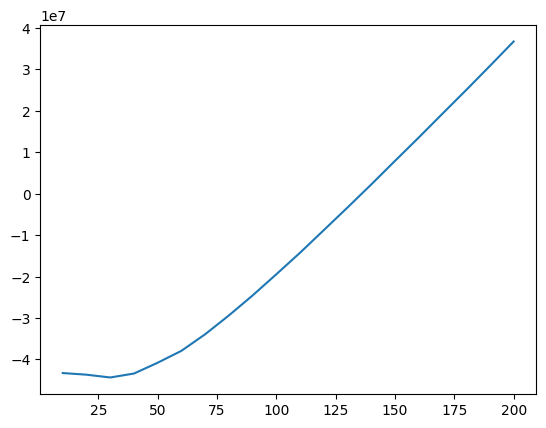

In [6]:
n_components = np.arange(10, 210, 10)
aicsGMM = []
for n in n_components:
    GMM = GaussianMixture(n, covariance_type='full', random_state=0, verbose = 2)
    aicsGMM.append(GMM.fit(X_subset).aic(X_subset))

aicsGMM = np.array([aicsGMM])
plt.title("Gaussian Mixture Model") 
plt.xlabel("k")   
plt.ylabel("AIC")   
plt.plot(n_components, aicsGMM)

In [ ]:
optimized_param = n_components[aicsGMM.argmin]
print(optimized_param)

In [9]:
optGMM = GaussianMixture(optimized_param, covariance_type='full', random_state=0, verbose = 2).fit(X)

Initialization 0
  Iteration 10	 time lapse 562.69767s	 ll change 3.68446
  Iteration 20	 time lapse 525.07977s	 ll change 0.06165
  Iteration 30	 time lapse 520.83644s	 ll change 0.00421
Initialization converged: True	 time lapse 1869.04374s	 ll 2786.42207


In [274]:
z = np.array([random.randint(0, 29) for _ in range(64)])
mean = optGMM.means_[z]
cov = optGMM.covariances_[z]

pictures = np.array([np.random.multivariate_normal(mean[i], cov[i]) for i in range(64)])
tensorPics = torch.tensor(pictures).view(64, 1, 28, 28)
save_image(tensorPics, "results/random64.png")
# tensorPicture = torch.tensor([torch.tensor(pic).view(1, 1, 28, 28) for pic in pictures])

In [22]:
print(optGMM.score(X_test))

2786.4220658422655


# Factor Analysis

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440


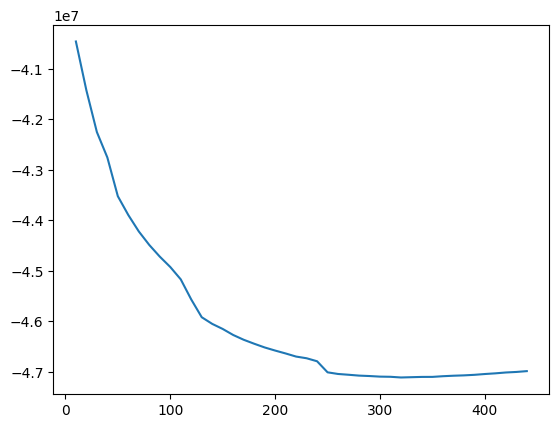

In [34]:
k_components = np.arange(10, 510, 10)
aicsFA = []
for k in k_components:
    print(k)
    model = FactorAnalysis(n_components=k, random_state=0).fit(X_subset)
    score = model.score(X_subset) * len(X_subset)
    p = len(X_subset[0])
    correction = (p * (k + 1) - k * (k - 1) / 2) * np.log(len(X_subset))
    aic = -2 * score + correction
    aicsFA.append(aic)
    
plt.title("Factor Analysis") 
plt.xlabel("k")   
plt.ylabel("AIC")   
plt.plot(k_components, aicsFA)

In [35]:
aicsFA = np.array([aicsFA])

In [36]:
print(aicsFA.argmin())

31


In [38]:
print(k_components[31])

320


In [39]:
optFA = FactorAnalysis(n_components=320, random_state=0).fit(X)

In [40]:
print(optFA.score(X_test))

2037.4374354443937


In [50]:
print(optFA.components_.shape)

(320, 784)


In [275]:
pictureFA2 = np.random.multivariate_normal(optFA.mean_, optFA.get_covariance(), 64)
tensorPicsFA = torch.tensor(pictureFA2).view(64, 1, 28, 28)
save_image(tensorPicsFA, "results/random64FA.png")

### Lower dim for test

In [281]:
comps = [2, 5, 10, 20, 30, 60, 100, 200 ,300 ,400 , 500 ,600 , 700, 785]
for comp in comps:
    fa_iter = FactorAnalysis(n_components=comp).fit(X)
    pictures_iter = np.random.multivariate_normal(fa_iter.mean_, fa_iter.get_covariance(), 64)
    tensorPic_iter = torch.tensor(pictures_iter).view(64, 1, 28, 28)
    save_image(tensorPic_iter, f"results/64FA{comp}.png")